<a href="https://colab.research.google.com/github/ayushranjanroy/Data-Science-Projects/blob/main/WaterPotability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
!nvidia-smi


Sun Jun 27 19:22:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Loading Data From URL**

In [195]:
!pip install pandas --quiet

In [196]:
import pandas as pd


In [197]:
url = "https://raw.githubusercontent.com/ayushranjanroy/Dataset_/main/water_potability.csv?token=ARQSXC37D7RPOYCYBG2IJBTA3DIBG"

In [198]:
from urllib.request import urlretrieve

In [199]:
urlretrieve(url,'data.csv')

('data.csv', <http.client.HTTPMessage at 0x7f2419d37990>)

In [200]:
import pandas as pd

In [201]:
import numpy as np

In [202]:
dataset=pd.read_csv('data.csv')

Checking for missing values, statistical summary, type of data and normalization.

In [203]:
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [204]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [205]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Filling missing data by it's columns variables averages or mean.

In [206]:
dataset["Sulfate"]= dataset["Sulfate"].replace(np.NaN,dataset["Sulfate"].mean())

In [207]:
dataset["Trihalomethanes"]= dataset["Trihalomethanes"].replace(np.NaN,dataset["Trihalomethanes"].mean())

In [208]:
dataset["ph"]= dataset["ph"].replace(np.NaN,dataset["ph"].mean())

This can also be approached with **SimpleImputer** - strategy - mean which is built in sklearn


In [209]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [210]:
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [211]:
col=dataset.columns


In [212]:
col

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [213]:
dataset["ph"].nunique

<bound method IndexOpsMixin.nunique of 0       7.080795
1       3.716080
2       8.099124
3       8.316766
4       9.092223
          ...   
3271    4.668102
3272    7.808856
3273    9.419510
3274    5.126763
3275    7.874671
Name: ph, Length: 3276, dtype: float64>

In [214]:
print(dataset["Sulfate"][:20])

0     368.516441
1     333.775777
2     333.775777
3     356.886136
4     310.135738
5     326.678363
6     393.663396
7     303.309771
8     268.646941
9     404.041635
10    326.624353
11    333.775777
12    282.344050
13    299.415781
14    333.775777
15    364.487687
16    333.775777
17    398.350517
18    333.775777
19    335.754439
Name: Sulfate, dtype: float64


In [215]:
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [216]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [217]:
dataset.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


**Exploratory Data Analysis**

In [218]:
!pip install plotly matplotlib seaborn --quiet

In [219]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



0    1998
1    1278
Name: Potability, dtype: int64

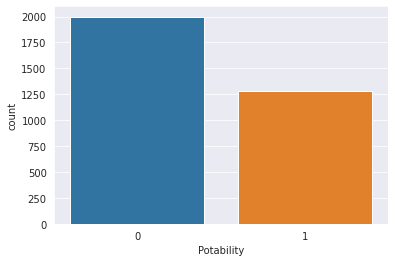

In [220]:
sns.countplot(dataset['Potability'])
dataset['Potability'].value_counts()

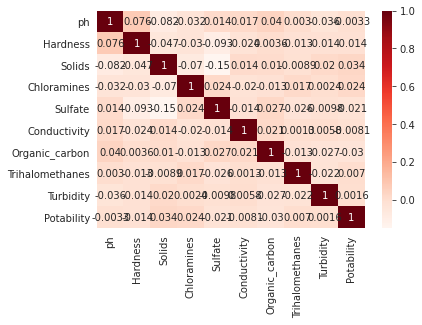

In [221]:
sns.heatmap(dataset.corr(), cmap='Reds',annot=True)

Info: Correlation of the attributes are very low than usual and also the attributes are independent.

In [222]:
dataset.corr().unstack().sort_values(ascending=False).drop_duplicates().head(8)

Potability      Potability        1.000000
ph              Hardness          0.075833
                Organic_carbon    0.040061
Potability      Solids            0.033743
Sulfate         Organic_carbon    0.026909
                Chloramines       0.023791
Chloramines     Potability        0.023779
Organic_carbon  Conductivity      0.020966
dtype: float64

In [223]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

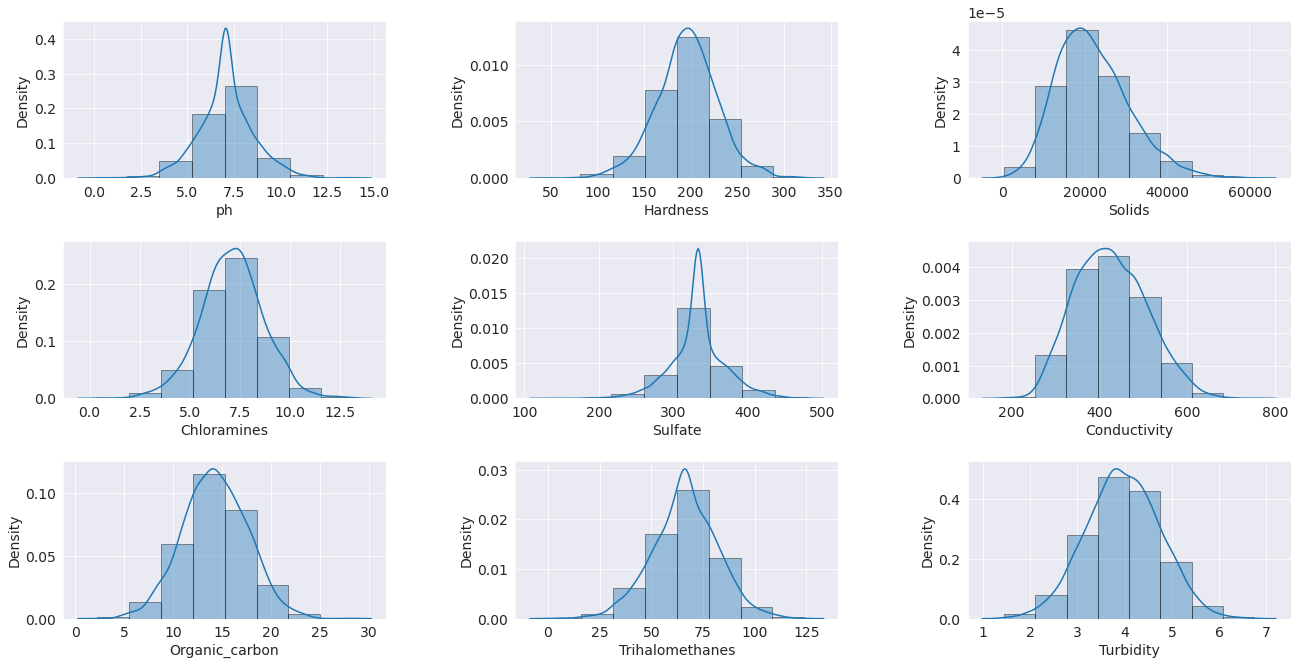

In [224]:
# Let us check the distribution of the attributes

fig = plt.figure(figsize=(22, 11))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(3, 3, 1)
sns.distplot(dataset['ph'], hist_kws=dict(edgecolor='k', linewidth=1), bins=8)
ax = fig.add_subplot(3, 3, 2)
sns.distplot(dataset['Hardness'], hist_kws=dict(edgecolor='k', linewidth=1), bins=8)
ax = fig.add_subplot(3, 3, 3)
sns.distplot(dataset['Solids'], hist_kws=dict(edgecolor='k', linewidth=1), bins=8)
ax = fig.add_subplot(3, 3, 4)
sns.distplot(dataset['Chloramines'], hist_kws=dict(edgecolor='k', linewidth=1), bins=8)
ax = fig.add_subplot(3, 3, 5)
sns.distplot(dataset['Sulfate'], hist_kws=dict(edgecolor='k', linewidth=1), bins=8)
ax = fig.add_subplot(3, 3, 6)
sns.distplot(dataset['Conductivity'], hist_kws=dict(edgecolor='k', linewidth=1), bins=8)
ax = fig.add_subplot(3, 3, 7)
sns.distplot(dataset['Organic_carbon'], hist_kws=dict(edgecolor='k', linewidth=1), bins=8)
ax = fig.add_subplot(3, 3, 8)
sns.distplot(dataset['Trihalomethanes'], hist_kws=dict(edgecolor='k', linewidth=1), bins=8)
ax = fig.add_subplot(3, 3, 9)
sns.distplot(dataset['Turbidity'], hist_kws=dict(edgecolor='k', linewidth=1), bins=8)
plt.show()

Looking for some insight/useful information from graphs, plots etc but the values are fairly and evenly distributed.

**Pairplot**

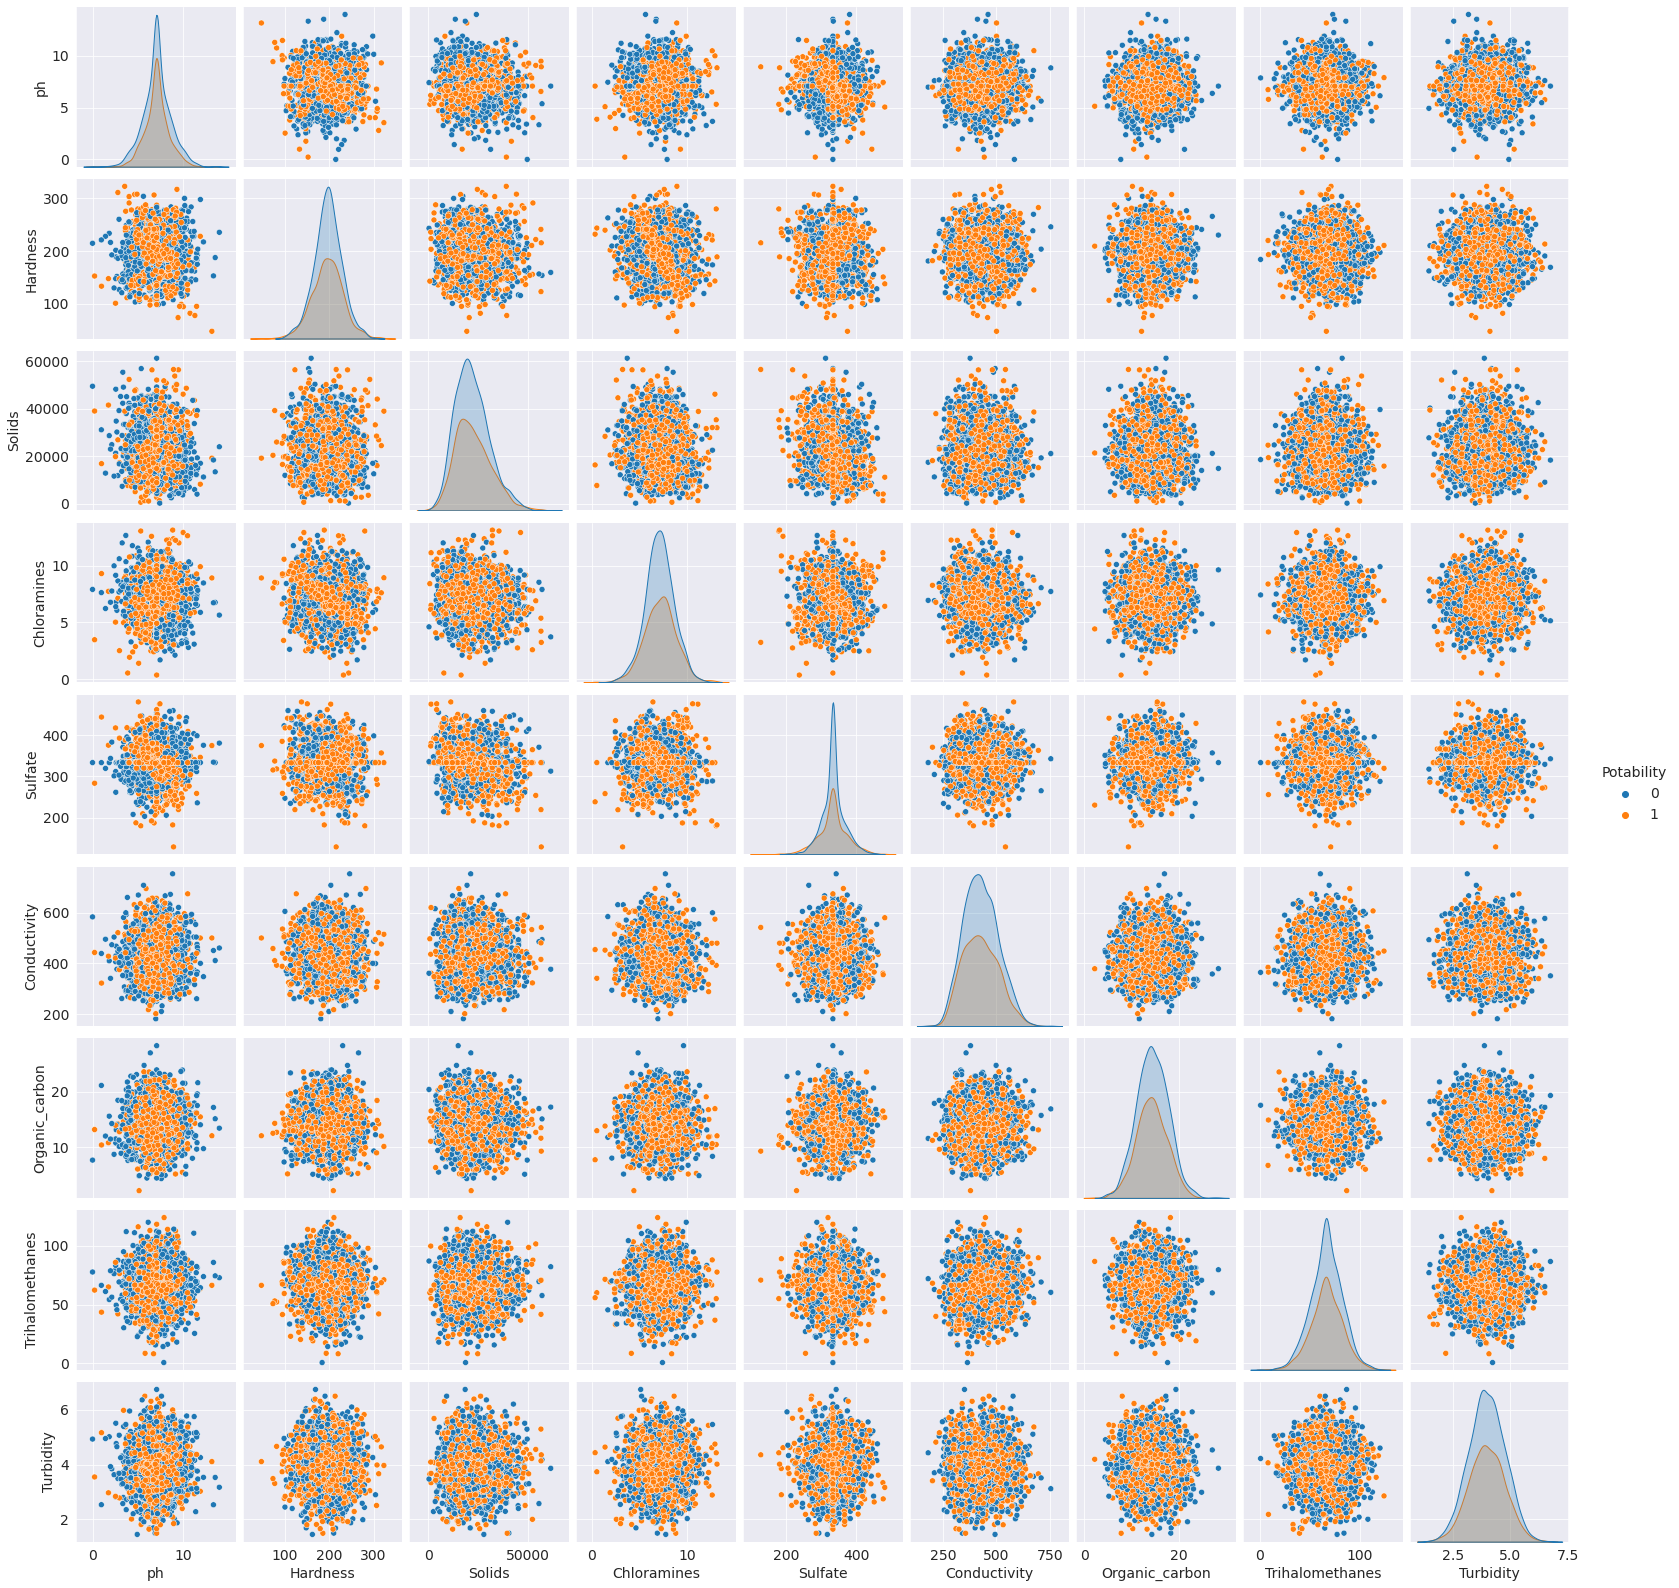

In [225]:
sns.pairplot(data = dataset , hue ='Potability')

In [226]:
fig = px.histogram(dataset, 
                   x='ph', 
                   marginal='box', 
                   nbins=40, 
                   title='ph')
fig.update_layout(bargap=0.1)
fig.show()

In [227]:
fig = px.histogram(dataset, 
                   x='Hardness', 
                   marginal='box', 
                   nbins=40, 
                   title='hardness')
fig.update_layout(bargap=0.1)
fig.show()

In [228]:
fig = px.histogram(dataset, 
                   x='Chloramines', 
                   marginal='box', 
                   nbins=40, 
                   title='Chloramines')
fig.update_layout(bargap=0.1)
fig.show()

In [229]:
fig = px.scatter(dataset, 
                 x='Hardness', 
                 y='ph',
                 color = 'Potability',
                 opacity=0.8, 
                 title='Comparisions')
fig.update_traces(marker_size=5)
fig.show()

In [230]:
fig = px.histogram(dataset, 
                   x='ph', 
                   marginal='box', 
                   color='Potability', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Training , Validation , Testing , scaling , One-hot Encoder**

In [231]:
!pip install scikit-learn --upgrade 

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [232]:
from sklearn.model_selection import train_test_split

In [233]:
train_df, test_df = train_test_split(dataset, test_size=0.3)

In [234]:
test_df.shape

(983, 10)

In [235]:
train_df.shape

(2293, 10)

**Indentify Input and output Columns**

In [236]:
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [237]:
input_cols=list(train_df.columns)[:-1]

In [238]:
target_col='Potability' 

In [239]:
train_input = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

**Scaling** of the values are necessary because it increase the accuracy of the model and error is less.

In [240]:
test_input = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [241]:
from sklearn.preprocessing import MinMaxScaler

In [242]:
scaler = MinMaxScaler()

In [243]:
scaler.fit(train_df[input_cols])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [244]:
list(scaler.data_min_)


[0.0,
 47.431999999999995,
 728.7508295768456,
 0.3520000000000003,
 129.00000000000003,
 181.483753985146,
 2.1999999999999886,
 8.175876384274268,
 1.45]

In [245]:
train_input[input_cols] = scaler.transform(train_input[input_cols])
test_input[input_cols] = scaler.transform(test_input[input_cols])


In [246]:
train_input.head(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2879,0.312197,0.570626,0.204858,0.515112,0.698358,0.386769,0.831360,0.589631,0.572817
340,0.505739,0.414055,0.200150,0.376708,0.695939,0.659834,0.405297,0.531809,0.557119
713,0.361687,0.451282,0.230551,0.623609,0.581699,0.447759,0.565135,0.636931,0.462179
717,0.735623,0.639505,0.185311,0.632231,0.592231,0.379809,0.507628,0.456001,0.339683
2007,0.470658,0.494716,0.277265,0.479032,0.678158,0.402368,0.378875,0.502662,0.583874
1364,0.476254,0.429837,0.267405,0.375752,0.438079,0.377756,0.588037,0.637520,0.355748
2226,0.582345,0.594241,0.192251,0.549954,0.602161,0.555868,0.477500,0.772303,0.752571
2554,0.522906,0.752635,0.393559,0.542904,0.613895,0.427763,0.475039,0.448817,0.879114
371,0.440580,0.545983,0.274739,0.322080,0.782915,0.394018,0.376511,0.345329,0.515625
1472,0.433247,0.414963,0.257350,0.425261,0.581699,0.601075,0.356978,0.613973,0.728488


In [247]:
fig = px.scatter(dataset, 
                 x='Hardness', 
                 y='ph',
                 color = 'Potability',
                 opacity=0.8, 
                 title='Comparisions')
fig.update_traces(marker_size=5)
fig.show()

**BUILING A MACHINE LEARNING MODEL**

**rANDOM fOREST cLASSIFIER**

In [248]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
from sklearn.model_selection import GridSearchCV

In [250]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

In [251]:
?RandomForestClassifier

In [252]:
param_grid = {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False], 'criterion':['entropy', 'gini']}
rfcgrid = GridSearchCV(RandomForestClassifier(random_state=101), param_grid, verbose=100, cv=10, n_jobs=-2)
rfcgrid.fit(train_input,train_target)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100, score=0.687, total=   1.2s
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100, score=0.670, total=   1.1s
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100, score=0.683, total=   1.2s
[Parallel(n_jobs=-2)]: Done   3 out of   3 | elapsed:    3.5s remaining:    0.0s
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estim

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=101,
                                

In [253]:
rfcgrid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 100}

In [254]:
rfcpredictions = rfcgrid.predict(test_input)


In [255]:
print("Confusion Matrix - Random Forest Using Entropy Index")
print(confusion_matrix(test_target,rfcpredictions))
print("\n")
print("Accuracy Score - Random Forest")
print(accuracy_score(test_target, rfcpredictions))
print("\n")
print("Classification Report - Random Forest")
print(classification_report(test_target,rfcpredictions))
print("\n")
print("F1 Score - Random Forest")
print(f1_score(test_target, rfcpredictions))

Confusion Matrix - Random Forest Using Entropy Index
[[536  82]
 [251 114]]


Accuracy Score - Random Forest
0.6612410986775178


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       618
           1       0.58      0.31      0.41       365

    accuracy                           0.66       983
   macro avg       0.63      0.59      0.58       983
weighted avg       0.64      0.66      0.63       983



F1 Score - Random Forest
0.4064171122994653
